# Gaussian Mixture Models

Gaussian Mixture Models(or GMMs) are a clustering algorithm similar to k-means. In fact, it is a generalization over k-means.
### Working
GMM assumes that the data is spread in a superposition of multiple gaussian distributions and attempts to recognize these gaussians. The number of gaussians is similar to the k in k-means algorithm.
Just like k-means, this algorithm is also divided into 2 steps:

- Random initializtions of means and variances(co-variance in case of more than 1 dimensions) and classifying points likewise

- Re-assigning of the mean and covariances based on the labelled points
and repeat

This process is called Expectation Maximization(EM)

A major difference here is that the classification of points is not hard. Thus, a point may belong to multiple classes with certain probabilities and we use them to reassign our mean and covariance

<img src='https://i.ytimg.com/vi/iQoXFmbXRJA/hqdefault.jpg'>
ref. Victor Lawrenko

Victor Lawrenko has explained GMMs very well. Do have a look [here](https://www.youtube.com/watch?v=REypj2sy_5U)

Here, we use Bayes rule to find the probability of belonging to class A given the datapoint and use it to calculate mean and covariance

Lets try this out on toy data

In [1]:
#Importing dependancies
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Generating toy data
toy_data = np.random.rand(50,2)*10
print(toy_data)

[[8.59960045 8.15785782]
 [4.71378849 6.92342725]
 [5.94267432 2.8765105 ]
 [7.72115843 2.1905888 ]
 [4.16659548 5.12252721]
 [8.25167305 9.29508504]
 [4.49029997 6.7493005 ]
 [8.88869667 1.01157645]
 [8.58206246 9.88654578]
 [3.03826807 1.54852799]
 [7.68730242 2.75979756]
 [5.43448468 1.22775951]
 [7.84574095 3.57831589]
 [2.73604316 8.36506067]
 [7.71337422 7.1015327 ]
 [7.65809525 0.33032718]
 [2.85856616 9.75921735]
 [1.65749365 9.3375478 ]
 [3.50811671 4.04321506]
 [3.22158286 8.52952268]
 [5.73411771 2.10336438]
 [8.36729582 0.86922364]
 [3.19860287 2.53124535]
 [8.92604154 6.22959266]
 [1.20959182 4.7090794 ]
 [6.76256346 9.00981969]
 [6.4940991  2.3169034 ]
 [7.34458964 6.26761274]
 [2.4648002  9.62544039]
 [8.2885877  5.92319155]
 [4.35167215 2.62574048]
 [3.65279431 4.04450423]
 [4.94830313 6.7309733 ]
 [2.86640214 8.04081272]
 [6.75395747 6.37702329]
 [6.30729236 5.5748128 ]
 [8.09750071 0.07147615]
 [2.30991375 8.89390507]
 [7.66576505 2.30816226]
 [0.30029396 4.04775048]


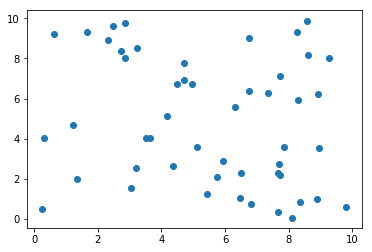

In [3]:
#Visulaizing toy data
plt.scatter(toy_data[:,0],toy_data[:,1])

# Main Program

Likelihood is defined as follows. lhd returns the likelihood given the data,row,class,covariance matrix sigma and the means

<img src='http://i.stack.imgur.com/EOyQI.png'>

In [4]:
#Likelihood calculation
def lhd(data,i,c,classcov,classmeans):
    f1 = 1/(np.sqrt(2*np.pi*np.linalg.det(classcov)))  
    f2 = data[i,:] - classmeans[c,:]
    f3 = np.transpose(f2)
    f4 = np.linalg.inv(classcov)
    res = f1 * np.exp(-0.5*np.matmul(np.matmul(f2,f4),f3))
    return res

In [112]:
#GMM algorithm
def GMM(data,k=2,priors = None):
    
    n=len(data[:,0]) #No. of datapoints
    f=len(data[0,:]) #No. of features
    
    if priors == None:
        priors = [1/k]*k  #Initializing priors if not specifically given
    
    classmeans = np.ones((k,f))  #initial assigned means of every feature for every class
    
    for dummy in range(k):
        rint = np.random.randint(0,len(data))  #will randomly select a row from the data
        classmeans[dummy,:] = data[rint,:]     #reassigns the means
    #initialization of means complete by introducing randomization
    
    #initializing covariances
    classcov = []
    for c in range(k):
        kcov = np.identity(f)
        classcov.append(kcov)
    #initializing covariances complete
    
    #Initialization Complete
    
    P = np.ones((n,k))  #P is a nXk matrix with P[n,k] representing the probability(class|datapoint )
    
    for ii in range(100):  #iterate 100 times
        #Step 1 - Making a P(class|datapoint matrix)
        
        for i in range(n):
            for c in range(k):
                P[i,c] = priors[c] * lhd(data,i,c,classcov[c],classmeans) #calculating the numerator of posterior probability
            P[i,:] = P[i,:] / sum(P[i,:]) #dividing numerator of posterior probability by its denominator
        # P made
    
        #Step 2 - Updating
    
        #Updating priors
        priors = [P[:,c].mean() for c in range(k) ]
    
        #Updating classmeans
        for c in range(k):
            classmeans[c,:] = (1/(n*priors[c])) * (np.matmul(np.transpose(P[:,c]),data))
    
        #Updating co-variances
        for c in range(k):
            for j in range(f):
                for kk in range(f):
                    f1 = (data[:,j]-classmeans[c,j]) * (data[:,kk]-classmeans[c,kk])
                    classcov[c][j,kk] = (1/(n*priors[c])) * np.dot(P[:,c],f1)
    
    return P

In [113]:
cmap =(GMM(toy_data))
print(cmap)

[[7.77564903e-06 9.99992224e-01]
 [4.39625879e-03 9.95603741e-01]
 [9.99423546e-01 5.76453806e-04]
 [9.99828502e-01 1.71497560e-04]
 [7.20369268e-01 2.79630732e-01]
 [2.50466349e-07 9.99999750e-01]
 [8.95638725e-03 9.91043613e-01]
 [9.99993936e-01 6.06390571e-06]
 [3.21609997e-08 9.99999968e-01]
 [9.99999220e-01 7.80098386e-07]
 [9.98808344e-01 1.19165605e-03]
 [9.99998685e-01 1.31484757e-06]
 [9.78821922e-01 2.11780783e-02]
 [1.33267685e-04 9.99866732e-01]
 [3.97954224e-04 9.99602046e-01]
 [9.99999752e-01 2.47898983e-07]
 [1.34434820e-06 9.99998656e-01]
 [1.10637155e-05 9.99988936e-01]
 [9.93670617e-01 6.32938306e-03]
 [5.75008208e-05 9.99942499e-01]
 [9.99965524e-01 3.44758916e-05]
 [9.99997371e-01 2.62939916e-06]
 [9.99972470e-01 2.75301297e-05]
 [3.37918041e-03 9.96620820e-01]
 [9.86979129e-01 1.30208710e-02]
 [1.45267121e-06 9.99998547e-01]
 [9.99880393e-01 1.19607128e-04]
 [7.60948887e-03 9.92390511e-01]
 [2.63493604e-06 9.99997365e-01]
 [1.33910099e-02 9.86608990e-01]
 [9.999160

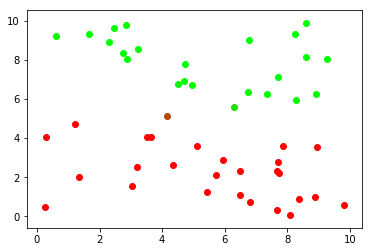

In [114]:
for i in range(len(toy_data)):
    plt.scatter(toy_data[i,0],toy_data[i,1],c=[cmap[i,0],cmap[i,1],0])

As seen above, the upper points are bright green and the lower points are bright red, representing high probability of respective classes. Some points in the middle are coloured as a mixture of red and green, representing their participation in both classes. The division is based on the variable cmap whose columns give the amounts of red and green respectively.

Since the initializations of means is random, we will see a different plot every time we run the program.